Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\quezi\AppData\Local\Temp\jieba.cache
Loading model cost 0.797 seconds.
Prefix dict has been built successfully.


生成完成


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(24, 384)
(24, 2)
<class 'numpy.ndarray'>


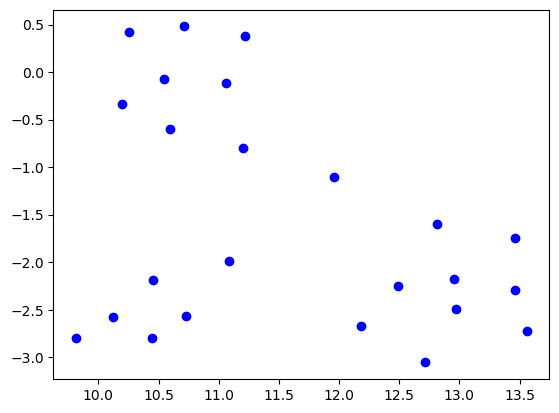

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import random
import jieba
import re
import umap


def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f)
    return stopwords

stopwords = load_stopwords('stopwords')
data_set = []  #用于存储文档

file = open('data.txt', 'r', encoding='utf-8')
for line in file.readlines():
    line = line.strip()
    line = jieba.lcut(line)
    line = [re.sub(r'\W', '', word) for word in line if word not in stopwords] 
    line = ' '.join(line)
    data_set.append(line)




print('生成完成')

sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

embeddings = sentence_model.encode(data_set, show_progress_bar=True)
print(embeddings.shape) #输出句子的embedding的维度

# print(embeddings[0]) #输出第一句话的embedding
# print('句子的个数：',len(data_set)) #输出句子的个数

def reduce_dimensions(embeddings):
    reducer = umap.UMAP()
    embeddings_2d = reducer.fit_transform(embeddings)
    return embeddings_2d

embeddings_2d = reduce_dimensions(embeddings)

print(embeddings_2d.shape) #输出降维后的维度
for i in range(len(embeddings_2d)):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='blue')
print(type(embeddings_2d))
# <class 'numpy.ndarray'>
# 保存数据到本地
np.save('data.npy', embeddings_2d)



In [50]:
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.feature_extraction.text import CountVectorizer
# import random
# import re
# import umap
# # 读取
# embeddings_2d = np.load('data.npy')




# 加载 788points.txt
# 15.55,28.65
# 14.9,27.55
# 14.45,28.35
# 14.15,28.8
# 13.75,28.05
# 13.35,28.45
# 13,29.15
# 13.45,27.5
# 13.6,26.5
# 12.8,27.35
embeddings_2d = np.loadtxt('788points.txt', delimiter=',')

(788, 2)


{'core': [], 'border': [0]}
{'core': [], 'border': [0, 1]}
{'core': [], 'border': [0, 1]}
{'core': [], 'border': [0, 1, 3]}
{'core': [4], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3]}
{'core': [4, 5], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border': [0, 1, 3, 6]}
{'core': [4, 5, 7, 9, 10, 11, 12], 'border

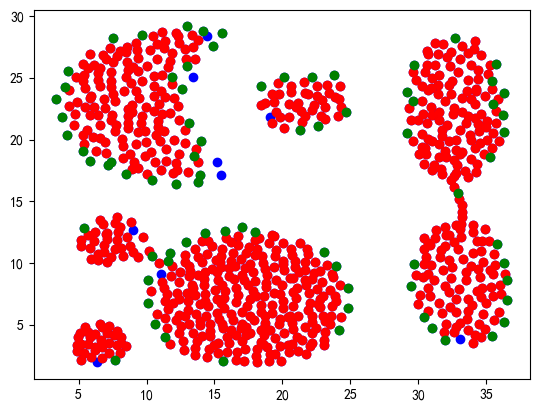

[{'core': [4, 5, 7, 9, 10, 11, 12, 8, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 23, 30, 32, 29, 31, 33, 34, 35, 46, 48, 52, 37, 38, 45, 47, 49, 50, 51, 53, 54, 130, 131, 129, 39, 40, 44, 55, 56, 57, 58, 59, 125, 132, 41, 42, 43, 60, 65, 70, 71, 72, 81, 83, 123, 124, 126, 127, 128, 133, 134, 144, 61, 62, 63, 66, 67, 73, 79, 80, 82, 84, 96, 121, 122, 135, 136, 137, 146, 64, 68, 74, 77, 85, 86, 94, 97, 98, 99, 120, 138, 139, 142, 143, 147, 155, 78, 87, 93, 95, 100, 101, 110, 140, 141, 148, 153, 154, 163, 89, 92, 102, 106, 107, 111, 113, 149, 150, 152, 156, 161, 91, 103, 112, 114, 115, 116, 151, 157, 158, 159, 160, 118], 'border': [0, 1, 3, 6, 14, 22, 27, 28, 36, 145, 69, 75, 76, 88, 162, 164, 90, 104, 105, 108, 109, 167, 117, 119, 168, 169]}, {'core': [171, 173, 174, 187, 188, 199, 200, 170, 175, 204, 185, 186, 189, 190, 176, 177, 178, 184, 191, 192, 197, 198, 201, 202, 203, 180, 181, 182, 183, 193, 194, 195, 196], 'border': [205, 179]}, {'core': [206, 211, 230, 231, 234, 227, 229, 232, 235

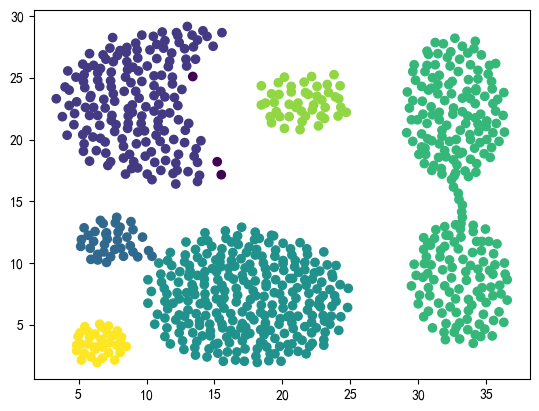

In [64]:
def range_query(X, i,eps):
    neighbors = []
    # 遍历所有点
    for j in range(len(X)):
        # 如果点j与点i的距离小于eps
        if np.linalg.norm(X[i] - X[j]) < eps:
            neighbors.append(j)
    return neighbors

def dbscan(X, eps, minPts):
    # 初始化簇标签：0表示噪声
    # labels = np.zeros(len(X), dtype=int)
    labels = [0] * len(X)
    cluster = []
    for i in range(len(X)):
        if labels[i] != 0:
            continue
        neighbors = range_query(X, i, eps)
        if len(neighbors) > minPts:
            cluster.append(grow_cluster(X, labels, i, neighbors, len(cluster) + 1, eps, minPts,cluster))
    return cluster,labels

def grow_cluster(X, labels, i, neighbors, C, eps, minPts,cluster):
    out = {'core':[], 'border':[]}
    labels[i] = C
    out_copy = [1]
    neighbors_copy = [1]
    labels_copy = [1]
    while out != out_copy or neighbors != neighbors_copy or labels != labels_copy:
        labels_copy = labels.copy()
        out_copy  = out.copy()
        neighbors_copy = neighbors.copy()
        for i in neighbors_copy:
            if labels[i] == 0:
                labels[i] = C
                temp = range_query(X, i, eps)
                if len(temp) >= minPts:
                    out['core'].append(i)
                    neighbors += temp
                    # 去重并排序
                    neighbors = list(set(neighbors))
                else:
                    out['border'].append(i)
            print(out)
            # plt_dbscan(X, cluster, out)
    return out

def plt_dbscan(X, cluster,out):
    for i in range(len(X)):
        if i in out['core']:
            plt.scatter(X[i, 0], X[i, 1], c='red')
        elif i in out['border']:
            plt.scatter(X[i, 0], X[i, 1], c='green')
        else:
            plt.scatter(X[i, 0], X[i, 1], c='blue')
    for i in range(len(cluster)):
        for j in cluster[i]['core']:
            plt.scatter(X[j, 0], X[j, 1], color='red')
        for j in cluster[i]['border']:
            plt.scatter(X[j, 0], X[j, 1], color='green')
    plt.show()

dbscan,labels = dbscan(embeddings_2d, 1.2, 5)
plt_dbscan(embeddings_2d, dbscan,{'core':[], 'border':[]})
print(dbscan)

# 绘制聚类结果
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels)

# 为每个点添加索引
# for i in range(embeddings_2d.shape[0]):
    # plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], str(i+ 1) )

plt.show()

[[12.969059  -2.4921043]]
-----------------------
[[12.969059  -2.4921043]
 [10.72489   -2.5627313]]
-----------------------
[[12.969059  -2.4921043]
 [10.72489   -2.5627313]
 [ 9.814649  -2.797388 ]]
-----------------------
[[12.969059  -2.4921043]
 [10.72489   -2.5627313]
 [ 9.814649  -2.797388 ]
 [10.198711  -0.3382254]]
-----------------------
[[12.969059  -2.4921043]
 [10.72489   -2.5627313]
 [ 9.814649  -2.797388 ]
 [10.198711  -0.3382254]
 [13.458989  -2.2888649]]
-----------------------
[[12.969059   -2.4921043 ]
 [10.72489    -2.5627313 ]
 [ 9.814649   -2.797388  ]
 [10.198711   -0.3382254 ]
 [13.458989   -2.2888649 ]
 [10.711688    0.47921497]]
-----------------------
[[12.969059   -2.4921043 ]
 [10.72489    -2.5627313 ]
 [ 9.814649   -2.797388  ]
 [10.198711   -0.3382254 ]
 [13.458989   -2.2888649 ]
 [10.711688    0.47921497]
 [10.592469   -0.5960554 ]]
-----------------------
[[12.969059   -2.4921043 ]
 [10.72489    -2.5627313 ]
 [ 9.814649   -2.797388  ]
 [10.198711   -0.3

c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49689 (\N{HANGUL SYLLA

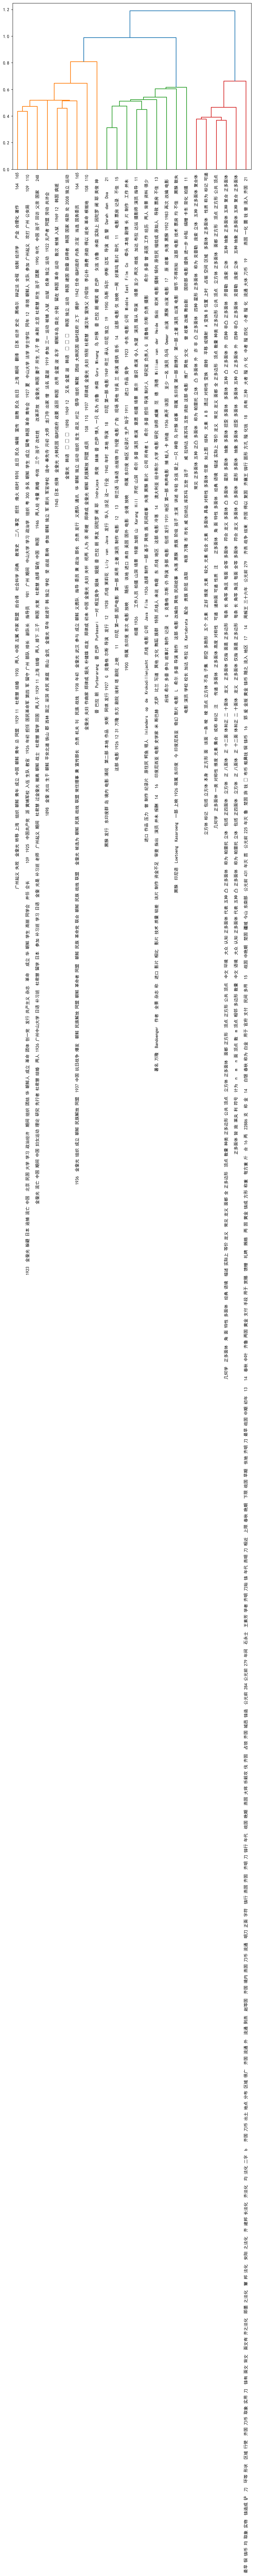

In [45]:
# 计算所有数据点之间的距离。
# 找到距离最近的两个数据点或者数据点群。
# 合并最近的两个数据点或者数据点群。
# 重复步骤2和3，直到所有数据点都被合并到一个群中。
def compute_distances(data):
    # 计算所有数据点之间的欧氏距离
    distances = np.sqrt(((data[:, np.newaxis] - data)**2).sum(axis=2))
    return distances

def find_closest(distances):
    # 找到距离最近的两个数据点
    min_dist = np.inf
    x, y = -1, -1
    for i in range(distances.shape[0]):
        for j in range(i+1, distances.shape[1]):
            if distances[i][j] < min_dist:
                min_dist = distances[i][j]
                x, y = i, j
    return x, y

def plot_clusters(data, clusters, merged_cluster):
    # 绘制当前的群集和新合并的群集之间的连线
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, cluster in enumerate(clusters):
        # print(cluster), print(i)
        # print(data[cluster])


        centroid = np.mean(data[cluster], axis=0)
        # 将每个点连接到质心
        for point in data[cluster]:
            plt.arrow(centroid[0], centroid[1], point[0]-centroid[0], point[1]-centroid[1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')


        points = data[cluster]
        plt.scatter(points[:, 0], points[:, 1], c=colors[i%len(colors)])
    # if merged_cluster is not None:
    #     points = data[merged_cluster]
    #     plt.plot(points[:, 0], points[:, 1], c='black')
    plt.show()




def hierarchical_clustering(data):
    # 执行层次聚类算法
    out = {}
    i = 0
    clusters = [[i] for i in range(data.shape[0])]
    centers = []  # 初始化中心点列表
    distances = compute_distances(data)
    while len(clusters) > 1:
        # print(clusters)
        out[i] = str(clusters)
        out[i] = json.dumps(out[i], ensure_ascii=False)
        i += 1
        x, y = find_closest(distances)
        distances[x] = (distances[x] + distances[y]) / 2
        distances[:, x] = (distances[:, x] + distances[:, y]) / 2
        distances = np.delete(distances, y, axis=0)
        distances = np.delete(distances, y, axis=1)
        clusters[x].extend(clusters[y])
        merged_cluster = clusters[y]
        center = np.mean(data[merged_cluster], axis=0)  # 计算新的群集中心
        centers.append(center)  # 将新的群集中心添加到中心点列表中
        del clusters[y]
        print(np.array(centers))
        print('-----------------------')
        # plot_clusters(data, clusters, merged_cluster)  # 绘制群集和连线
    centers = np.array(centers)
    # for i in range(1, len(centers)):
    #     plt.plot([centers[i-1, 0], centers[i, 0]], [centers[i-1, 1], centers[i, 1]], 'k-')  # 连接中心点
    return out

out = hierarchical_clustering(embeddings_2d)
# 假设我们有以下的数据和群集



# 绘制最终的群集和连线
# plot_clusters(embeddings_2d, out, None)


from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data, labels):
    plt.figure(figsize=(10, 7))  # 设置图的大小
    linked = linkage(data, 'single')
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=labels)
    plt.xticks(rotation=90)  # 旋转标签
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
    plt.rcParams['axes.unicode_minus'] = False  
    plt.show()

plot_dendrogram(embeddings_2d, data_set)


